Github link: https://github.com/genom10/Sensors2023/tree/master/HW4

# Task 4.1

## Generate noisy data

### Generate main line

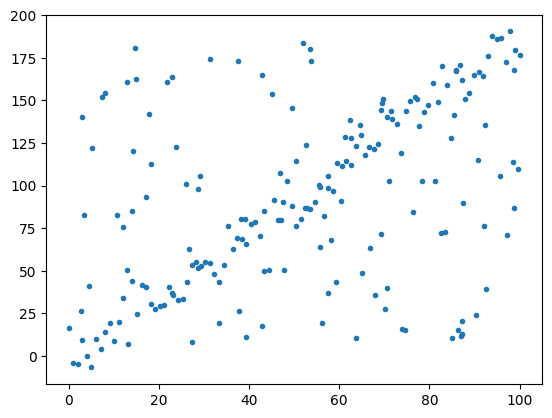

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    try:
        return x*2-10 + np.random.normal(scale=10, size=len(x))
    except:
        return x*2-10 + np.random.normal(scale=10)

X = np.linspace(0, 100, 100)
Y = f(X)

noizedX = np.append(X, np.random.uniform(low=0, high=100, size = 100))
noizedY = np.append(Y, np.random.uniform(low=f(0), high=f(100), size = 100))

plt.plot(noizedX, noizedY, '.')

## Hough Transform

In [60]:
from numpy import sin, cos, deg2rad
p_max = int(np.ceil(np.hypot(np.max(noizedX), np.max(noizedY))))
accumulator = np.zeros((p_max, 180))

for point in zip(noizedX, noizedY):
    for angle in range(180):
        p = point[0]*sin(deg2rad(angle)) - point[1]*cos(deg2rad(angle))
        accumulator[int(p), angle] += 1

## Visualisation

<AxesSubplot: >

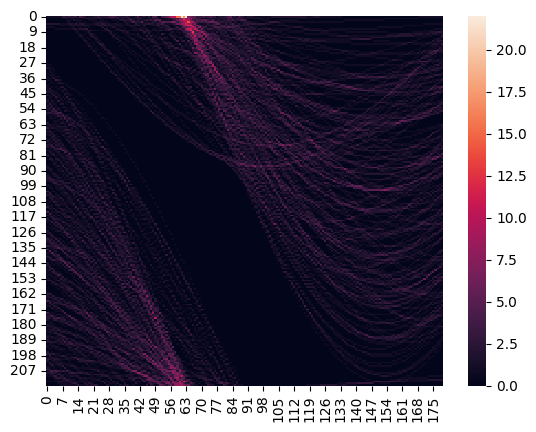

In [61]:
import seaborn as sns
sns.heatmap(accumulator)

### Plot the line

p=0, angle=61


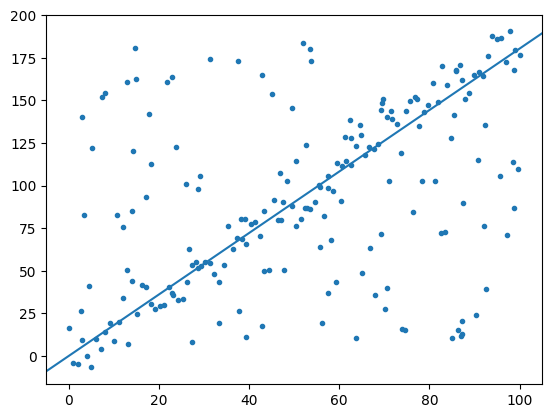

In [76]:
maxindex = accumulator.argmax()
p, angle = np.unravel_index(accumulator.argmax(), accumulator.shape)
print(f'p={p}, angle={angle}')

plt.plot(noizedX, noizedY, '.')
plt.axline((0, p/cos(angle)), slope=np.tan(deg2rad(angle)))

# Task 4.2

## Load image

(609, 651, 4)


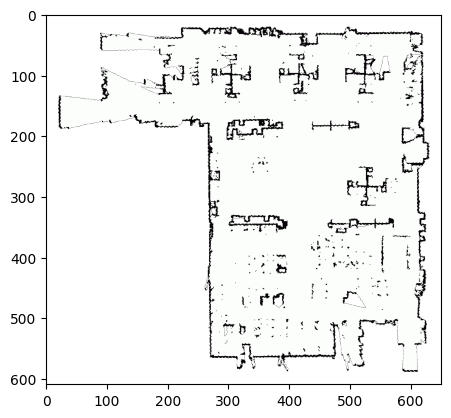

In [91]:
import cv2
  
img = cv2.imread("PodvalMap v.2.png", cv2.IMREAD_UNCHANGED)
print(img.shape)
plt.imshow(img)

## Apply Hough transform

In [144]:
p_max = int(np.ceil(np.hypot(img.shape[0], img.shape[1])))
accumulator = np.zeros((p_max, 180))

for row, line in enumerate(img):
    for col, point in enumerate(line):
        if point[3] > 30:
            if point[0] < 30 and point[1] < 30 and point[2] < 30:
                # print(row, line,'\n', point)
                for angle in range(180):
                    p = col*sin(deg2rad(angle)) + row*cos(deg2rad(angle))
                    accumulator[int(p), angle] += 1

## Visualisation

<AxesSubplot: >

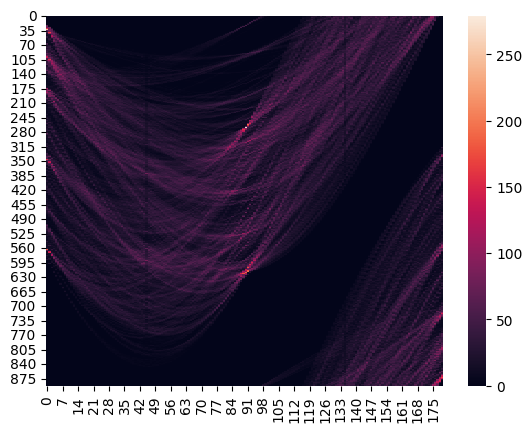

In [145]:
sns.heatmap(accumulator)

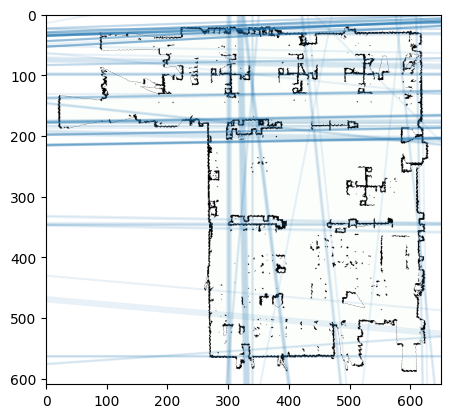

In [152]:
number_of_lines = 400
maxindexes = np.argpartition(accumulator, -number_of_lines, axis=None)[-number_of_lines:]
ps, angles = np.unravel_index(maxindexes, accumulator.shape)


plt.imshow(img)
plt.xlim((0, img.shape[1]))
plt.ylim((img.shape[0], 0))
for p, angle in np.array(list(zip(ps, angles))):
    # print(p, line)
    if angle < 45:
        plt.axline((0, p/cos(angle)), slope=np.tan(deg2rad(angle)), alpha = 0.1)
    else:
        plt.axline((p/sin(angle), 0), slope=np.tan(deg2rad(angle)), alpha = 0.1)